# Hurricane Florence

<div style="position: relative; padding-bottom: 56.25%; height: 0;"><iframe src="https://www.loom.com/embed/d2de79cb757c47b7a3387924db9bbd30" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen style="position: absolute; top: 0; left: 0; width: 100%; height: 100%;"></iframe></div>


```{jupyter-info}
{rel-data-download}`gz_2010_us_040_00_5m.json`
{rel-data-download}`stormhistory.csv`
```

## Overlay - Hurricane Florence
The power of geospatial data is it allows you to combine many different types of data as long as you can "line up" how they occur in the real world. For example, the `country` dataset below holds the geometry for various states in the United States. The second dataset stored in the `florence` variable is a plain `DataFrame` that stores information about the the hurricane at various points in time. 

In this example, we will plot the data on top of each other to compare them. As a preview to a future lesson, we will next take this a step further to also highlight which states were hit by hurricane Florence.

We start with our imports for this notebook and then loading in the two datasets.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# A special command for Notebooks to get the plots inline
%matplotlib inline 

In [2]:
country = gpd.read_file('gz_2010_us_040_00_5m.json')
country.head()

GEO_ID STATE        NAME LSAD  CENSUSAREA  \
0  0400000US01    01     Alabama        50645.326   
1  0400000US02    02      Alaska       570640.950   
2  0400000US04    04     Arizona       113594.084   
3  0400000US05    05    Arkansas        52035.477   
4  0400000US06    06  California       155779.220   

                                            geometry  
0  MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ...  
1  MULTIPOLYGON (((-166.10574 53.98861, -166.0752...  
2  POLYGON ((-112.53859 37.00067, -112.53454 37.0...  
3  POLYGON ((-94.04296 33.01922, -94.04304 33.079...  
4  MULTIPOLYGON (((-122.42144 37.86997, -122.4213...

<AxesSubplot:>

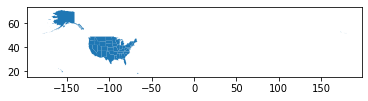

In [3]:
country.plot()

This is a VERY tiny graph because it's trying to show states not in the mainland. It turns out, the visualization won't involve Alaska or Hawaii, so we leave them out of this analysis for clarity.
> Note, this comes back to the discussion of how a data analyst has to choose what they include/exclude (e.g., what they deem "relevant"), which is where a lot of tricky biases can sneak in. Think carefully about the assumptions you make in an analysis and the impact of potentially excluding some aspect of the data.

We start by filtering out the rows for Hawaii/Alaska.

<AxesSubplot:>

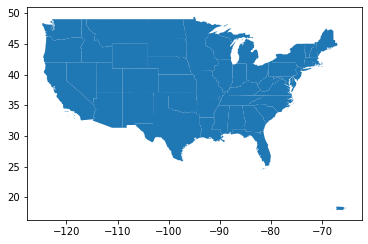

In [4]:
country = country[(country['NAME'] != 'Alaska') & (country['NAME'] != 'Hawaii')]
country.plot()

Now let's load in the data of hurricane Florence. This is stored in a plain-old CSV so we read it in with `pandas`.

In [5]:
florence = pd.read_csv('stormhistory.csv')
florence.head()

AdvisoryNumber              Date   Lat  Long  Wind  Pres  \
0              1  08/30/2018 11:00  12.9  18.4    30  1007   
1             1A  08/30/2018 14:00  12.9  19.0    30  1007   
2              2  08/30/2018 17:00  12.9  19.4    30  1007   
3             2A  08/30/2018 20:00  13.1  20.4    30  1007   
4              3  08/30/2018 23:00  13.2  20.9    35  1007   

                Movement                        Type Name          Received  \
0  W at 12 MPH (280 deg)  Potential Tropical Cyclone  Six  08/30/2018 10:45   
1  W at 12 MPH (280 deg)  Potential Tropical Cyclone  Six  08/30/2018 13:36   
2   W at 9 MPH (280 deg)  Potential Tropical Cyclone  Six  08/30/2018 16:36   
3  W at 11 MPH (280 deg)  Potential Tropical Cyclone  Six  08/30/2018 19:44   
4  W at 13 MPH (280 deg)  Potential Tropical Cyclone  Six  08/30/2018 22:42   

  Forecaster  
0      Avila  
1      Avila  
2      Avila  
3      Beven  
4      Beven

<AxesSubplot:>

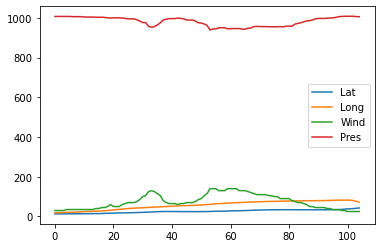

In [6]:
florence.plot()

Huh, this doesn't look like the path of hurricane Florence at all! In fact, this data viz doesn't really tell us much at all! The reason is this `pandas.DataFrame` doesn't have any notion of geospatial data. Even though there are columns for the longitude (`Long`) and the latitude (`Lat`), it is just plotting them as if they were any other numeric column!

To fix this, we will need to turn it to `geopandas.GeoDataFrame`. In order to do this, we will need to construct a `Point` geometry since each row corresponds to a single point where the hurricane was. We will create a new column called `coordinates` that stores these `Point` objects from the `shapely` library of geometric shapes. The code to do this is relatively complex so do not worry too much about understanding it. If you're curious how we turn the `Lat` and `Long` columns to these points, we explain the following code:
* `zip` the `Long` and `Lat` column to get a series of `(long, lat)` pairs.
* Loop over this generator and create a `Point` for each one. As a technical note, we need to negate the longitude because our US dataset stores longitudes for the US as negative values.
* Store the resulting `Point`s in a new column of `florence.`

In [7]:
from shapely.geometry import Point

# Add new-lines for clarity
florence['coordinates'] = [
    Point(-long, lat) 
    for long, lat 
    in zip(florence['Long'], florence['Lat'])
]

We can then convert this to a `geopandas.GeoDataFrame` with the following cell. Notice the new column `coordinates` stores the geometry for each row!

In [8]:
florence = gpd.GeoDataFrame(florence, geometry='coordinates')
florence.head()

AdvisoryNumber              Date   Lat  Long  Wind  Pres  \
0              1  08/30/2018 11:00  12.9  18.4    30  1007   
1             1A  08/30/2018 14:00  12.9  19.0    30  1007   
2              2  08/30/2018 17:00  12.9  19.4    30  1007   
3             2A  08/30/2018 20:00  13.1  20.4    30  1007   
4              3  08/30/2018 23:00  13.2  20.9    35  1007   

                Movement                        Type Name          Received  \
0  W at 12 MPH (280 deg)  Potential Tropical Cyclone  Six  08/30/2018 10:45   
1  W at 12 MPH (280 deg)  Potential Tropical Cyclone  Six  08/30/2018 13:36   
2   W at 9 MPH (280 deg)  Potential Tropical Cyclone  Six  08/30/2018 16:36   
3  W at 11 MPH (280 deg)  Potential Tropical Cyclone  Six  08/30/2018 19:44   
4  W at 13 MPH (280 deg)  Potential Tropical Cyclone  Six  08/30/2018 22:42   

  Forecaster                 coordinates  
0      Avila  POINT (-18.40000 12.90000)  
1      Avila  POINT (-19.00000 12.90000)  
2      Avila  POINT (-19.40000 12.90000)  
3      Beven  POINT (-20.40000 13.10000)  
4      Beven  POINT (-20.90000 13.20000)

<AxesSubplot:>

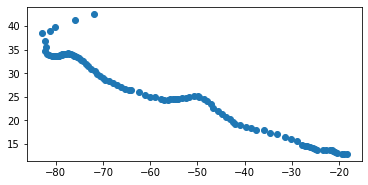

In [9]:
florence.plot()

And now it prints out the path of the hurricane! Remember, understanding the details of the transformation from lat/long columns to a single column is not important. **What is important to understand is you need to make a `GeoDataFrame` if you want to leverage geospatial displays/processing.**

## Plot the Hurricane
So now that we have our `country` data and `florence` data, let's try plotting them together to see where the hurricane hit the U.S. We pass in an extra parameters to the `florence` plot to make the dots black and a bit smaller.

<AxesSubplot:>

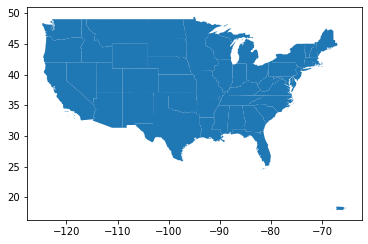

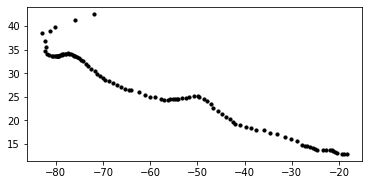

In [10]:
country.plot()
florence.plot(color='black', markersize=10)

That dooesn't look right! Why didn't they plot on top of each other? 

Remember, by default plotting functions generally make a new **figure** so each plot will end up being completely separate. To fix this, we need to make a figure with a single axes, and have both plots draw on that axis. We pass in an additional parameter `figsize` to make the figure slightly larger.

<AxesSubplot:>

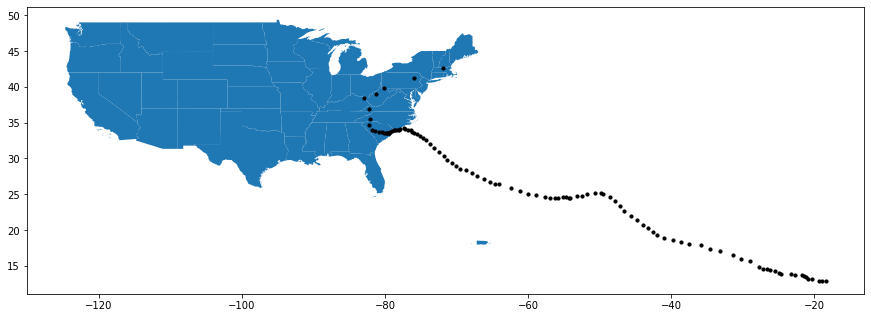

In [11]:
fig, ax = plt.subplots(1, figsize=(15, 7))

country.plot(ax=ax)
florence.plot(color='black', markersize=10, ax=ax)

That looks much better! This can show the power of geospatial data, since it very naturally lets you overlap data if they occur in the same location in the world. 

Next time, we will pick up with this example and do something more complex that involves highlighting which states intersect with the hurricane's path!

## Recap
* `geopandas.GeoDataFrame` lets you make plots that capture geospatial information.
* If you want to plot multiple plots on the same axes, you need to explicitly make a `Figure` and `Axes` and pass the axes in.
* (Less important) Unless your data comes in a geospatial format, converting them to one can be pretty tedious.